## Part 1: Build a classification model using text data

## 

The data consists of headlines that signify clickbait or not.  Training and test data are stored in the following objects: X_train, X_test, y_train_labels, y_test_labels.  The remaining objects can be ignored.

Use cross-validation to evaluate the results. Use a robust metric for classification  (AUC or F1-Score for example), and inspect all models by visualizing the coefficients. (See helper function in our in class notebook for text models.)

To complete part one of the homework do the following:

Import the text data, vectorize the clickbait headline column into an X matrix.  Then run logistic regression at least three times and select a single best model.  Note that you should create three logistic regression models with different different tokenization approaches.  You should not change your modeling approach, you should simply experiment with different tokenizers. Be sure to explain your choices and evaluate your models using cross validation and using test set data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
import math
%matplotlib inline

In [2]:
# input data 
X_train = pd.read_csv("X_train.csv", squeeze=True)
y_train_labels = pd.read_csv("y_train.csv", squeeze=True)

/var/folders/lz/kx0jb1cs78z2m2gstxkqjmvr0000gn/T/ipykernel_24994/3223854178.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  X_train = pd.read_csv("X_train.csv", squeeze=True)
/var/folders/lz/kx0jb1cs78z2m2gstxkqjmvr0000gn/T/ipykernel_24994/3223854178.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_train_labels = pd.read_csv("y_train.csv", squeeze=True)


In [3]:
# get dummies 
y_train = pd.get_dummies(y_train_labels).values[:,1]
y_train

array([1, 1, 0, ..., 0, 1, 1], dtype=uint8)

In [4]:
X_train.head(10)

0       MyBook Disk Drive Handles Lots of Easy Backups
1                       CIT Posts Eighth Loss in a Row
2    Candy Carson Singing The "National Anthem" Is ...
3    Why You Need To Stop What You're Doing And Dat...
4    27 Times Adele Proved She's Actually The Reale...
5    29 Times #BlackGirlMagic Was More Than Just A ...
6    Scientology ties at New Village Leadership Aca...
7               Judge Allows Asbestos Case to Continue
8              Cities Deal With a Surge in Shantytowns
9                15 Reasons December Is The Best Month
Name: headline, dtype: object

In [5]:
# redefine x, y 
X = X_train
y = y_train

In [6]:
# set up training and test data
# X_train, X_test, y_train_labels, y_test_labels. 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_labels, y_test_labels = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(y_train_labels.shape)

(18734,)
(18734,)


In [7]:
# First tokenization approaches: CountVetorizer 
from sklearn.feature_extraction.text import CountVectorizer

vect1 = CountVectorizer().fit(X_train)
X1 = vect1.transform(X_train)
print("X1:\n{}".format(repr(X1)))

X1:
<18734x17790 sparse matrix of type '<class 'numpy.int64'>'
	with 165328 stored elements in Compressed Sparse Row format>


In [8]:
X1_dense = X1.toarray()
print("Dense representation of bag_of_words:\n{}".format(X1_dense))

Dense representation of bag_of_words:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [9]:
feature_names1 = vect1.get_feature_names_out()
print("Number of features: {}".format(len(feature_names1)))
print("30 features number between 2000~2030 :\n{}".format(feature_names1[2000:2030]))

Number of features: 17790
30 features number between 2000~2030 :
['blew' 'blige' 'blight' 'blind' 'blindly' 'blindy' 'bling' 'blip' 'bliss'
 'blitzed' 'blizzard' 'blob' 'blobfish' 'blobs' 'block' 'blockade'
 'blockades' 'blockbuster' 'blocked' 'blocking' 'blocks' 'blog' 'blogger'
 'bloggers' 'blond' 'blonde' 'blood' 'bloodshed' 'bloodstock' 'bloody']


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(), X1, y_train_labels, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.97


In [11]:
# use cross-validation
from sklearn.model_selection import GridSearchCV
param_grid1 = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid1 = GridSearchCV(LogisticRegression(), param_grid1, cv=5) 
grid1.fit(X1, y_train_labels)
print("Best cross-validation score: {:.2f}".format(grid1.best_score_))
print("Best parameters: ", grid1.best_params_)


/Users/yemei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yemei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Best cross-validation score: 0.97
Best parameters:  {'C': 10}


/Users/yemei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
X_test_list = X_test.tolist()
X_test1 = vect1.transform(X_test_list)
print("Test score: {:.2f}".format(grid1.score(X_test1, y_test_labels)))

Test score: 0.97


### In first mode, I used CountVectorizer this tokenization approach. The total number of feature is 17790. With the cross-validation, the best parameters is C=10, the test score is 97%. 

In [13]:
# Second tokenization approaches: narrow bag of words to words in at least 10 documents

vect2 = CountVectorizer(min_df=10, stop_words='english').fit(X_train)
X2 = vect2.transform(X_train)
print("X2:\n{}".format(repr(X2)))

X2:
<18734x2341 sparse matrix of type '<class 'numpy.int64'>'
	with 76253 stored elements in Compressed Sparse Row format>


In [14]:
X2_dense = X2.toarray()
print("Dense representation of bag_of_words:\n{}".format(X2_dense))

Dense representation of bag_of_words:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
feature_names2 = vect2.get_feature_names_out()
print("Number of features: {}".format(len(feature_names2)))
print("30 features number between 2000~2030 :\n{}".format(feature_names2[2000:2030]))

Number of features: 2341
30 features number between 2000~2030 :
['steve' 'steven' 'stewart' 'stimulus' 'stock' 'stocks' 'stolen' 'stone'
 'stop' 'stops' 'store' 'stores' 'stories' 'storm' 'story' 'straight'
 'street' 'strike' 'strikes' 'strip' 'strong' 'struggle' 'struggles'
 'student' 'students' 'study' 'stunning' 'style' 'styles' 'success']


In [16]:
scores = cross_val_score(LogisticRegression(), X2, y_train_labels, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.94


In [17]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5) 
grid.fit(X2, y_train_labels)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

/Users/yemei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yemei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Best cross-validation score: 0.94
Best parameters:  {'C': 1}


/Users/yemei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
X_test2 = vect2.transform(X_test_list)
print("Test score: {:.2f}".format(grid.score(X_test2, y_test_labels)))

Test score: 0.93


### In second model, I used CountVectorizer this tokenization approach, and  narrow bag of words to words in at least 10 documents with english stopwords. There have a sparse matrix with a shape of (18734, 2341), and total number of the feature is 2341. With cross-validation, the best corss validation score is 0.94 and best parameter is C=1; the test score is 0.93. 

In [19]:
# Three tokenization approach: TfidVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

vect3 = TfidfVectorizer(min_df=5, norm=None)
X3 = vect3.fit_transform(X_train)
print("X3:\n{}".format(repr(X3)))

param_grid3 = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid3 = GridSearchCV(LogisticRegression(), param_grid3, cv=5)
grid3.fit(X3, y_train_labels)

# Print best parameters and cross-validation score
print("Best cross-validation score: {:.2f}".format(grid3.best_score_))
print("Best parameters: ", grid3.best_params_)

# Transform X_test using the fitted TfidfVectorizer
X_test3 = vect3.transform(X_test)

# Predict using the fitted Logistic Regression model
y_pred3 = grid3.predict(X_test3)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test_labels, y_pred3)
print("Test accuracy: {:.2f}".format(test_accuracy))

X3:
<18734x4509 sparse matrix of type '<class 'numpy.float64'>'
	with 143808 stored elements in Compressed Sparse Row format>


/Users/yemei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yemei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Best cross-validation score: 0.97
Best parameters:  {'C': 0.1}
Test accuracy: 0.97


/Users/yemei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### In third model, TfidVectorizer was the last the tokenization approach used. With cross-validation, the best parameter is C=0.1, best cross-validation score is 0.97 and test accracy score is 0.97. 

In [20]:
#import this for coef visualization
def visualize_coefficients(coefficients, feature_names, n_top_features=25):
    """Visualize coefficients of a linear model.
    Parameters
    ----------
    coefficients : nd-array, shape (n_features,)
        Model coefficients.
    feature_names : list or nd-array of strings, shape (n_features,)
        Feature names for labeling the coefficients.
    n_top_features : int, default=25
        How many features to show. The function will show the largest (most
        positive) and smallest (most negative)  n_top_features coefficients,
        for a total of 2 * n_top_features coefficients.
    """
    coefficients = coefficients.squeeze()
    if coefficients.ndim > 1:
        # this is not a row or column vector
        raise ValueError("coeffients must be 1d array or column vector, got"
                         " shape {}".format(coefficients.shape))
    coefficients = coefficients.ravel()

    if len(coefficients) != len(feature_names):
        raise ValueError("Number of coefficients {} doesn't match number of"
                         "feature names {}.".format(len(coefficients),
                                                    len(feature_names)))
    # get coefficients with large absolute values
    coef = coefficients.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients,
                                          positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ['#ff2020' if c < 0 else '#0000aa'
              for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients],
            color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60,
               ha="right")
    plt.ylabel("Coefficient magnitude")
    plt.xlabel("Feature")

F1-score for model 1: 0.97


/Users/yemei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


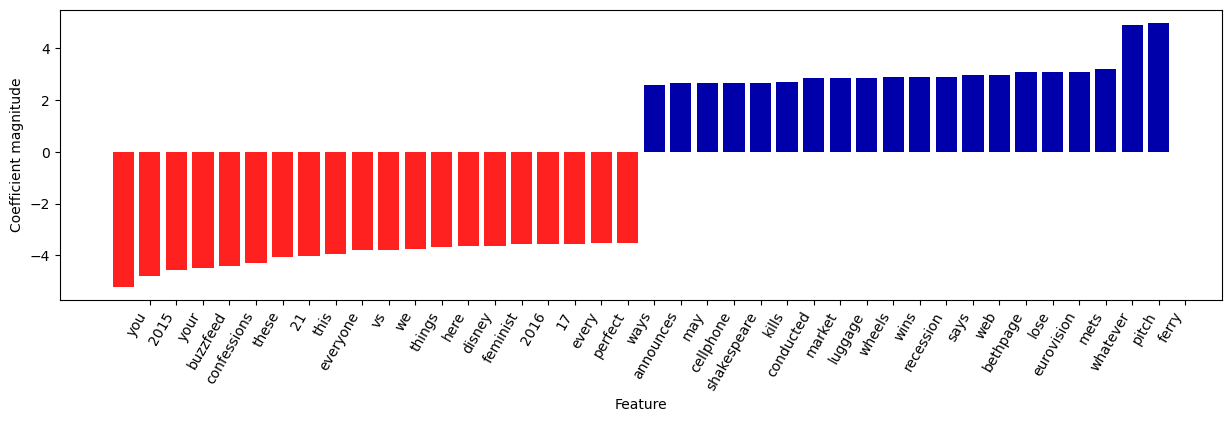

In [21]:
# F1 score for first approach 
from sklearn.metrics import f1_score

X_test_tfidf1 = vect1.transform(X_test_list)

# Predict using the fitted Logistic Regression model
y_pred1 = grid1.predict(X_test_tfidf1)

# Calculate F1-score
f1_1 = f1_score(y_test_labels, y_pred1)
print("F1-score for model 1: {:.2f}".format(f1_1))


# Visualize coefficients for first approach
coef1 = LogisticRegression(C=10).fit(X1, y_train_labels).coef_
feature_names1 = vect1.get_feature_names_out()
visualize_coefficients(coef1, feature_names1, n_top_features=20)

### F1 score for first model is 0.97. In the coeffecient graph, blue presents the words under blue category are more likely to consider as clickbait, red presents the words under red category are more likley to consider as non-clickbait. For instance, in the graph, we can see the word, you, 2015, and your, are top three words that will less likely to consider as clickbait. For words, ferry, pitch, and whatever, are top three words that will most likely to consider as clickbait. 

F1-score: 0.94


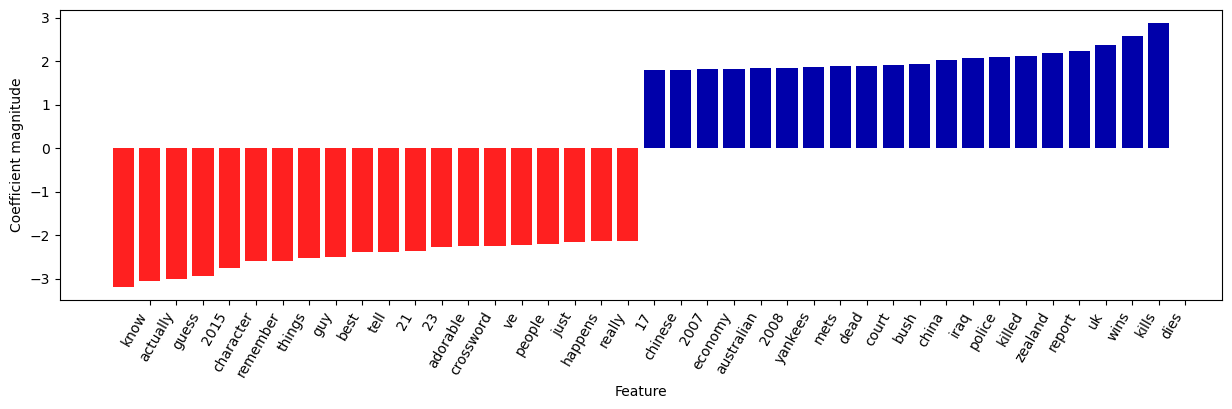

In [22]:
# F1 score for second approach 
y_pred2 = grid.predict(X_test2)

# Calculate F1-score
f1_2 = f1_score(y_test_labels, y_pred2)
print("F1-score: {:.2f}".format(f1_2))

# Visualize coefficients for second approach
coef2 = LogisticRegression(C=1).fit(X2, y_train_labels).coef_
feature_names2 = vect2.get_feature_names_out()
visualize_coefficients(coef2, feature_names2, n_top_features=20)

### F1 score for first model is 0.94. We can see the word in the graph, for example, know, actually, and guess, are top three words that will less likely to consider as clickbait. For words, dies, kills, and wins, are top three words that will most likely to consider as clickbait. 

F1-score: 0.97


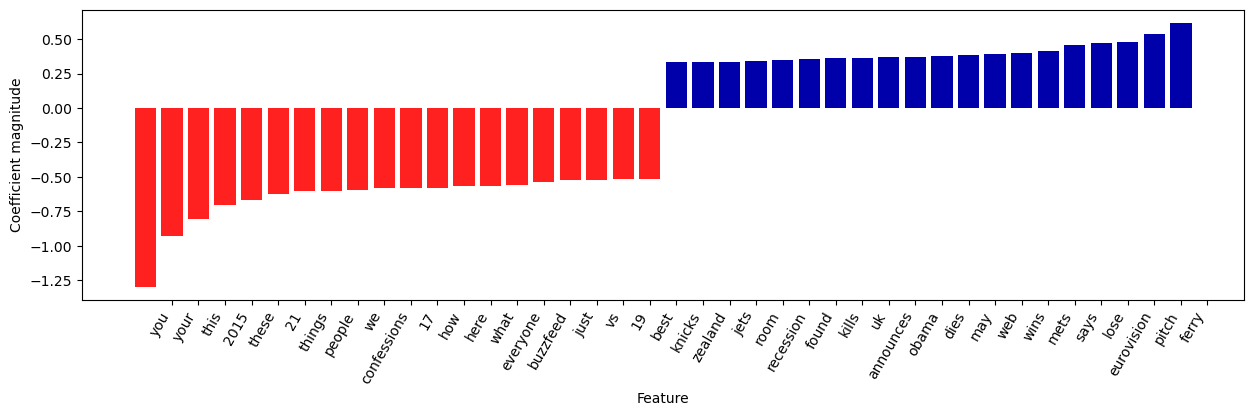

In [23]:
# F1 score for Third approach

f1_3 = f1_score(y_test_labels, y_pred3)
print("F1-score: {:.2f}".format(f1_3))

# Visualize coefficients for third approach
coef3 = LogisticRegression(C=0.1).fit(X3, y_train_labels).coef_
feature_names3 = vect3.get_feature_names_out()
visualize_coefficients(coef3, feature_names3, n_top_features=20)


### F1 score for third model is 0.97. We can see the word in the graph, for example, you, your, and this, are top three words that will less likely to consider as clickbait. For words, ferry, pitch, and eurovision, are top three words that will most likely to consider as clickbait. 


### Overall, compared with three models, I can filiter model 2 out initially as the test score 0.93 is lower than model 1 and model 3, both are 0.97. Compared with model 1 and model 3, both them have same cross-validation score, test accuracy score, as well as f1 score, they are 0.97. We can conclude that CountVectorizer and TfidVectorizer in the logistic regression model did not impact the training at all. While, compared with their coefficient magnititude, model 1 have a wide range of 4 to -4, while mode 3 have a interpretable range of 0.5 to -1.25. In this case, some features in the model 1 have a stronger impact on the clickbait. While, it's more easy to explain each feature in the model 3. Therefore, I would like to pick model 3 in this case. 
### Additionally, looking at model 1 and model 3 top three words that most likely and less likely impact on clickbait, we can conclude that the word like you and your are more likly to recognize as the non-clickbait words in the context, and the word like ferry and pitch are more likely to recognize as the clickbait words in the context. 

## Part 2: Build a predictive neural network using Keras

Train test split the iris dataset and then run a multilayer perceptron (feed forward neural network) with two hidden layers on the iris dataset using the keras Sequential interface.

Data can be imported via the following link:

http://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv

fit two models with different numbers of hidden layers and or hidden neurons and evaluate each on a test-set.  Describe the differences in the predictive accuracy of models with different numbers of hidden units/neurons.  Describe the predictive strength of your best model.  Be sure to explain your choice and evaluate this model using the test set.

In [24]:
iris_df = pd.read_csv("http://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv")
iris_df.head(5)

,rownames,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [29]:
from sklearn.preprocessing import LabelEncoder

X = iris_df.drop(['rownames', 'Species'], axis=1)
y = iris_df['Species']
y1 = pd.get_dummies(y)

display(iris_df.head())
display(X.head())
display(y1[0::10])

,rownames,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,setosa,versicolor,virginica
0,1,0,0
10,1,0,0
20,1,0,0
30,1,0,0
40,1,0,0
50,0,1,0
60,0,1,0
70,0,1,0
80,0,1,0
90,0,1,0


In [30]:
#model with one hidden layers

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y1, random_state=42)
print(X_train.shape)
print(y_train.shape)


model1 = Sequential()

model1.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model1.add(Dense(units=64, activation='relu'))
model1.add(Dense(units=3, activation='softmax'))

sgd = SGD(lr=0.0001)  # define a learning rate for optimization

model1.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model1.fit(X_train, y_train, validation_split=0.20, epochs=30, batch_size=32)

score1 = model1.evaluate(X_test, y_test, batch_size=32) # extract loss and accuracy from test data evaluation
print('test', score1)


(112, 4)
(112, 3)
Epoch 1/30
3/3 [==============================] - 2s 200ms/step - loss: 1.3557 - accuracy: 0.0787 - val_loss: 1.1152 - val_accuracy: 0.3043
Epoch 2/30
3/3 [==============================] - 0s 33ms/step - loss: 1.0955 - accuracy: 0.2584 - val_loss: 1.0109 - val_accuracy: 0.5652
Epoch 3/30
3/3 [==============================] - 0s 41ms/step - loss: 1.0123 - accuracy: 0.4045 - val_loss: 0.9440 - val_accuracy: 0.5217
Epoch 4/30
3/3 [==============================] - 0s 28ms/step - loss: 0.9339 - accuracy: 0.5506 - val_loss: 0.8967 - val_accuracy: 0.5217
Epoch 5/30
3/3 [==============================] - 0s 33ms/step - loss: 0.8982 - accuracy: 0.6180 - val_loss: 0.9079 - val_accuracy: 0.4783
Epoch 6/30
3/3 [==============================] - 0s 27ms/step - loss: 0.8618 - accuracy: 0.6742 - val_loss: 0.8609 - val_accuracy: 0.5217
Epoch 7/30
3/3 [==============================] - 0s 27ms/step - loss: 0.8381 - accuracy: 0.6854 - val_loss: 0.8024 - val_accuracy: 0.6957
Epoch 8/

### from this model, we have one input layer, one hidden layer, and one output layer that splite with three categories by looking at y shape. For input and hidden layer we have 64 units and for output layer we have 3 units. We set the epochs as 30 which the dataset will fit the model in 30 times, and finally we have 84% accuracy and 50% loss. 

In [31]:
# model 2 with two hidden layers

model2 = Sequential([
    Dense(64, input_shape=(4,)),  
    Activation('relu'),
    Dense(64),
    Activation('relu'),
    Dense(64),
    Activation('relu'),
    Dense(3),
    Activation('softmax'),
])

model2.summary()

# Compile the model with the new optimizer and metrics
sgd = SGD(lr=0.0001)
model2.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model2.fit(X_train, y_train, validation_split=0.20, epochs=30, batch_size=32)

score2 = model2.evaluate(X_test, y_test, batch_size=32)
print('test', score2)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                320       
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 activation_2 (Activation)   (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 3)                

Epoch 1/30
3/3 [==============================] - 1s 189ms/step - loss: 1.0593 - accuracy: 0.3258 - val_loss: 0.9503 - val_accuracy: 0.4783
Epoch 2/30
3/3 [==============================] - 0s 38ms/step - loss: 1.0029 - accuracy: 0.3034 - val_loss: 0.9311 - val_accuracy: 0.4783
Epoch 3/30
3/3 [==============================] - 0s 29ms/step - loss: 0.9759 - accuracy: 0.4045 - val_loss: 0.9177 - val_accuracy: 0.8261
Epoch 4/30
3/3 [==============================] - 0s 34ms/step - loss: 0.9514 - accuracy: 0.5506 - val_loss: 0.9133 - val_accuracy: 0.7826
Epoch 5/30
3/3 [==============================] - 0s 43ms/step - loss: 0.9303 - accuracy: 0.8989 - val_loss: 0.8965 - val_accuracy: 0.6087
Epoch 6/30
3/3 [==============================] - 0s 27ms/step - loss: 0.9074 - accuracy: 0.8876 - val_loss: 0.8820 - val_accuracy: 0.6957
Epoch 7/30
3/3 [==============================] - 0s 36ms/step - loss: 0.8863 - accuracy: 0.8652 - val_loss: 0.8588 - val_accuracy: 0.9130
Epoch 8/30
3/3 [==========

### for the second model, we add in additional one hidden layer and re-run the model again. Finally, we have 100% accuracy and 51% loss.
### compared with model 1 and model 2, with one additional unit increased in the layer, the model becomes more complicated and it improved the accuracy score and reduced the loss score. So, in the future, if we want to improve our accuracy score in the model, increase the number of layer could be one of the approach to achieve the goal. 

In [32]:
print(X_test.shape)


# for predicted probabilities
ypreds = model1.predict(X_test)
print(ypreds) #gives prediction of each category, largest is selected for predict_classes()


# for predicted label index of one hot encoded y data columns
# Can use this to return correct label from well ordered list of labels
ypreds_classindex = np.argmax(model1.predict(X_test), axis=-1)
print(ypreds_classindex) 

(38, 4)
2/2 [==============================] - 0s 11ms/step
[[0.06616195 0.4965768  0.4372612 ]
 [0.86073583 0.08676744 0.05249681]
 [0.0084225  0.39236993 0.5992075 ]
 [0.0766665  0.51949275 0.4038406 ]
 [0.06174653 0.50948584 0.4287677 ]
 [0.8322254  0.10385507 0.06391954]
 [0.17362428 0.51026505 0.31611076]
 [0.04464691 0.54176253 0.41359052]
 [0.0490751  0.48483154 0.46609324]
 [0.12151939 0.5137724  0.3647082 ]
 [0.05052062 0.5276826  0.42179668]
 [0.8009399  0.11805952 0.08100046]
 [0.8668227  0.0786254  0.0545518 ]
 [0.8026093  0.11809609 0.07929457]
 [0.85964453 0.0848033  0.0555521 ]
 [0.08602169 0.5341587  0.37981948]
 [0.02262898 0.46532083 0.51205015]
 [0.10662705 0.502656   0.3907169 ]
 [0.07382921 0.5011082  0.42506248]
 [0.02335541 0.465404   0.5112405 ]
 [0.7836989  0.13264658 0.08365449]
 [0.05379206 0.5129922  0.43321568]
 [0.8034022  0.12273264 0.07386509]
 [0.02397193 0.46278292 0.51324517]
 [0.02772576 0.50702643 0.4652478 ]
 [0.03778692 0.5227046  0.43950853]
 [0.

### this table presented the prediction score in each category. There are total three categories and thirty eight classes in X_set. We can see each class probability under the each category. The highst pobability in one class, we can say that class is categorized in that one. For instance, for first class, the category 2 have the highest probability score so the final index could be 1. 


In [33]:
print(X_test.shape)


# for predicted probabilities
ypreds2 = model2.predict(X_test)
print(ypreds2) #gives prediction of each category, largest is selected for predict_classes()


# for predicted label index of one hot encoded y data columns
# Can use this to return correct label from well ordered list of labels
ypreds2_classindex = np.argmax(model2.predict(X_test), axis=-1)
print(ypreds2_classindex) 


(38, 4)
2/2 [==============================] - 0s 4ms/step
[[0.09054009 0.4893153  0.42014462]
 [0.7829424  0.13844495 0.07861267]
 [0.02440004 0.32426253 0.65133744]
 [0.09287761 0.48905283 0.41806957]
 [0.08456852 0.5193715  0.39606   ]
 [0.75044227 0.15930392 0.09025393]
 [0.17620146 0.4852595  0.3385389 ]
 [0.05805032 0.4618712  0.4800784 ]
 [0.07873322 0.46792483 0.45334193]
 [0.13817303 0.50883335 0.35299352]
 [0.06462681 0.45676446 0.47860876]
 [0.7253687  0.17137653 0.10325482]
 [0.7902175  0.13174653 0.07803596]
 [0.72611076 0.17155328 0.10233594]
 [0.78339905 0.13253811 0.08406284]
 [0.09374615 0.49815637 0.40809762]
 [0.0410177  0.36791885 0.5910634 ]
 [0.12804127 0.5057671  0.36619172]
 [0.0948063  0.47329858 0.4318951 ]
 [0.04305992 0.37452215 0.582418  ]
 [0.7045743  0.18315256 0.11227317]
 [0.07077017 0.44935244 0.4798773 ]
 [0.72191757 0.17439476 0.10368765]
 [0.04400324 0.3778286  0.57816815]
 [0.04211545 0.4562611  0.50162345]
 [0.05257757 0.43573543 0.51168704]
 [0.0

###  We can see each class probability under the each category. The highst pobability in one class, we can say that class is categorized in that one. For instance, for first class, the category 2 have the highest probability score so the final index could be 1. 

### compared with model 1 and model 2, we can see some classes have different index. Since model 2 is more complicated and have higher accuracy score, we should take model 2's class index to do our future traning. 